## Merge one day data

In [71]:
import json
import csv
import glob
import os
from datetime import datetime

# JSON files directory path
json_files_directory = '20240524'
# CSV file output path for the combined data
combined_csv_file_path = 'filtered_merge_0524.csv'

# Specifying the desired fields and the order
desired_fields = ['sno', 'tot', 'sbi', 'sarea', 'lat', 'lng', 'bemp', 'act', 'date', 'time']

# Getting a list of all JSON files in the directory
json_files = glob.glob(os.path.join(json_files_directory, '*.json'))

# Initialize a list to store all filtered data
all_filtered_data = []

for json_file_path in json_files:
    # Reading JSON data from the file
    with open(json_file_path, 'r', encoding='utf-8') as jsonfile:
        json_data = json.load(jsonfile)

    # Extracting the desired fields from the JSON data
    for item in json_data:
        # Filter by sarea
        if item.get('sarea') not in ["大安區", "臺大公館校區"]:
            continue

        filtered_item = {}
        for field in desired_fields:
            # Check for the original fields or their alternatives
            if field in item:
                filtered_item[field] = item[field]
            elif field == 'tot' and 'total' in item:
                filtered_item[field] = item['total']
            elif field == 'sbi' and 'available_rent_bikes' in item:
                filtered_item[field] = item['available_rent_bikes']
            elif field == 'lat' and 'latitude' in item:
                filtered_item[field] = item['latitude']
            elif field == 'lng' and 'longitude' in item:
                filtered_item[field] = item['longitude']
            elif field == 'bemp' and 'available_return_bikes' in item:
                filtered_item[field] = item['available_return_bikes']
            elif field == 'date':
                update_time = item.get('updateTime') or item.get('mday')
                if update_time:
                    filtered_item[field] = update_time.split(' ')[0]
            elif field == 'time':
                update_time = item.get('updateTime') or item.get('mday')
                if update_time:
                    time_str = update_time.split(' ')[1]
                    filtered_item[field] = datetime.strptime(time_str, "%H:%M:%S").strftime("%H:%M")
            else:
                filtered_item[field] = None
        all_filtered_data.append(filtered_item)

# Writing the combined filtered data to a single CSV file
with open(combined_csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=desired_fields)
    writer.writeheader()
    writer.writerows(all_filtered_data)

print(f"All filtered JSON data has been combined and written to {combined_csv_file_path} successfully.")


All filtered JSON data has been combined and written to filtered_merge_0524.csv successfully.


## Sort by station and time

In [72]:
import pandas as pd

# CSV file path for the combined data
combined_csv_file_path = 'filtered_merge_0524.csv'

# Read the combined CSV file into a DataFrame
df = pd.read_csv(combined_csv_file_path)

# Convert the 'time' column to a datetime object for proper sorting
df['time'] = pd.to_datetime(df['time'], format='%H:%M').dt.time

# Sort the DataFrame by 'sno' and 'time'
df_sorted = df.sort_values(by=['sno', 'time'])

# Write the sorted DataFrame back to a CSV file
sorted_csv_file_path = 'sorted_output_filtered_0524.csv'
df_sorted.to_csv(sorted_csv_file_path, index=False, encoding='utf-8')

print(f"Sorted data has been written to {sorted_csv_file_path} successfully.")


Sorted data has been written to sorted_output_filtered_0524.csv successfully.


## Set time interval 5 mins

In [73]:
import pandas as pd

# Function to check if time is at desired 5-minute intervals
def is_desired_five_minute_interval(time):
    return time.minute % 5 == 0 and time.second == 0

# CSV file path for the combined data
combined_csv_file_path = 'sorted_output_filtered_0524.csv'

# Read the combined CSV file into a DataFrame
df = pd.read_csv(combined_csv_file_path)

# Convert the 'time' column to a datetime object for proper manipulation
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time

# Filter the DataFrame to only include rows where the time is at desired 5-minute intervals
df_filtered = df[df['time'].apply(is_desired_five_minute_interval)]

# Sort the DataFrame by 'sno' and 'time'
df_sorted = df_filtered.sort_values(by=['sno', 'time'])

# Write the sorted DataFrame back to a CSV file
sorted_csv_file_path = 'sorted_output_filtered_0524_5.csv'
df_sorted.to_csv(sorted_csv_file_path, index=False, encoding='utf-8')

print(f"Filtered and sorted data has been written to {sorted_csv_file_path} successfully.")


Filtered and sorted data has been written to sorted_output_filtered_0524_5.csv successfully.


## Plot and measure

/var/folders/2l/kqh7y27x3s7gdc5pbwkvy0xc0000gn/T/ipykernel_20126/1210884287.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['time'] = df_filtered['time'].astype(str)
/var/folders/2l/kqh7y27x3s7gdc5pbwkvy0xc0000gn/T/ipykernel_20126/1210884287.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['time'] = df_filtered['time'].apply(lambda x: x[:5] if len(x) > 5 else x)
/var/folders/2l/kqh7y27x3s7gdc5pbwkvy0xc0000gn/T/ipykernel_20126/1210884287.py:18: SettingWithCopyWarning: 
A valu

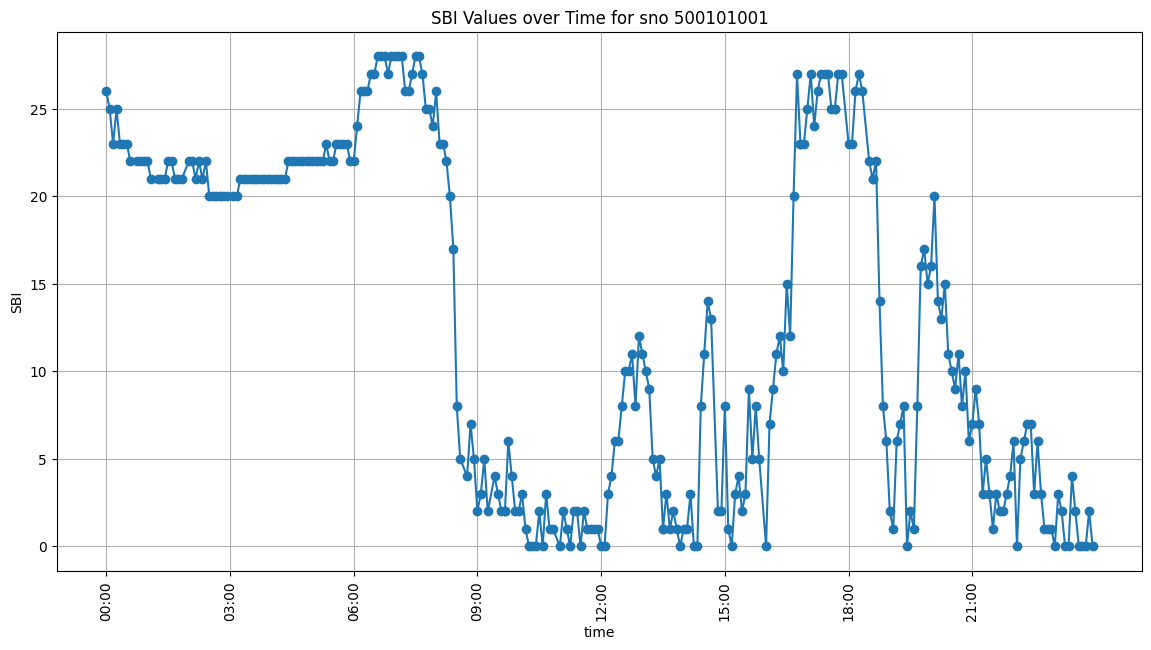

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
file_path = 'sorted_output_filtered_0524_5.csv'  # Modify to your CSV file path
df = pd.read_csv(file_path)

# Filter specific sno
df_filtered = df[df['sno'] == 500101001]

# Ensure 'time' column is converted to string type for processing
df_filtered['time'] = df_filtered['time'].astype(str)

# Remove seconds part from the time
df_filtered['time'] = df_filtered['time'].apply(lambda x: x[:5] if len(x) > 5 else x)

# Convert 'time' column to datetime format and change to time series
df_filtered['time'] = pd.to_datetime(df_filtered['time'], format='%H:%M')

# Plot sbi versus time
plt.figure(figsize=(14, 7))
plt.plot(df_filtered['time'], df_filtered['sbi'], marker='o')
plt.title('SBI Values over Time for sno 500101001')
plt.xlabel('time')
plt.ylabel('SBI')
plt.xticks(rotation=90)
plt.grid(True)

# Set custom x-axis ticks
xticks = pd.date_range(start='00:00', end='23:59', freq='3H').time
plt.gca().set_xticks([pd.Timestamp(f'1900-01-01 {time}').to_pydatetime() for time in xticks])
plt.gca().set_xticklabels([time.strftime('%H:%M') for time in xticks])

plt.show()


## json formate debug

In [38]:
import json
import csv
import glob
import os
from datetime import datetime

# JSON files directory path
json_files_directory = '20240514'
# CSV file output path for the combined data
combined_csv_file_path = 'filtered_merge_0514.csv'

# Specifying the desired fields and the order
desired_fields = ['sno', 'tot', 'sbi', 'sarea', 'lat', 'lng', 'bemp', 'act', 'date', 'time']

# Getting a list of all JSON files in the directory
json_files = glob.glob(os.path.join(json_files_directory, '*.json'))

# Initialize a list to store all filtered data
all_filtered_data = []

for json_file_path in json_files:
    try:
        # Reading JSON data from the file
        with open(json_file_path, 'r', encoding='utf-8') as jsonfile:
            json_data = json.load(jsonfile)
    except json.JSONDecodeError as e:
        print(f"Error reading {json_file_path}: {e}")
        continue  # Skip to the next file

    # Extracting the desired fields from the JSON data
    for item in json_data:
        if item.get('sarea') not in ["大安區", "臺大公館校區"]:
            continue

        filtered_item = {}
        for field in desired_fields:
            if field in item:
                filtered_item[field] = item[field]
            elif field == 'tot' and 'total' in item:
                filtered_item[field] = item['total']
            elif field == 'sbi' and 'available_rent_bikes' in item:
                filtered_item[field] = item['available_rent_bikes']
            elif field == 'lat' and 'latitude' in item:
                filtered_item[field] = item['latitude']
            elif field == 'lng' and 'longitude' in item:
                filtered_item[field] = item['longitude']
            elif field == 'bemp' and 'available_return_bikes' in item:
                filtered_item[field] = item['available_return_bikes']
            elif field == 'date':
                update_time = item.get('updateTime') or item.get('mday')
                if update_time:
                    filtered_item[field] = update_time.split(' ')[0]
            elif field == 'time':
                update_time = item.get('updateTime') or item.get('mday')
                if update_time:
                    time_str = update_time.split(' ')[1]
                    filtered_item[field] = datetime.strptime(time_str, "%H:%M:%S").strftime("%H:%M")
            else:
                filtered_item[field] = None
        all_filtered_data.append(filtered_item)

# Writing the combined filtered data to a single CSV file
with open(combined_csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=desired_fields)
    writer.writeheader()
    writer.writerows(all_filtered_data)

print(f"All filtered JSON data has been combined and written to {combined_csv_file_path} successfully.")


Error reading 20240514/youbike_1715638196.json: Expecting ':' delimiter: line 1 column 678151 (char 678150)
Error reading 20240514/youbike_1715637101.json: Expecting ',' delimiter: line 1 column 678164 (char 678163)
All filtered JSON data has been combined and written to filtered_merge_0514.csv successfully.


## Merge all 5 mins interval data

In [79]:
import pandas as pd
import glob
import os

# 指定含有 CSV 檔案的目錄
directory_path = '5min'

# 用 glob 模塊找出所有的 csv 檔案
csv_files = glob.glob(os.path.join(directory_path, '*.csv'))

# 讀取每一個檔案並將它們存儲在 list 中
data_frames = []
for file in csv_files:
    df = pd.read_csv(file)
    data_frames.append(df)

# 使用 concat 方法合併所有 DataFrame
combined_df = pd.concat(data_frames, ignore_index=True)

# 根據 sno, date, time 進行排序
combined_df.sort_values(by=['sno', 'date', 'time'], inplace=True)

# 將合併後的資料寫入新的 CSV 檔案
output_file_path = '3weeks.csv'
combined_df.to_csv(output_file_path, index=False)

print(f"All CSV files have been combined and sorted into {output_file_path} successfully.")


All CSV files have been combined and sorted into 3weeks.csv successfully.


## Plot specific day

/var/folders/2l/kqh7y27x3s7gdc5pbwkvy0xc0000gn/T/ipykernel_20126/18544626.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['time'] = df_filtered['time'].astype(str)
/var/folders/2l/kqh7y27x3s7gdc5pbwkvy0xc0000gn/T/ipykernel_20126/18544626.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['time'] = df_filtered['time'].apply(lambda x: x[:5] if len(x) > 5 else x)
/var/folders/2l/kqh7y27x3s7gdc5pbwkvy0xc0000gn/T/ipykernel_20126/18544626.py:20: SettingWithCopyWarning: 
A value is t

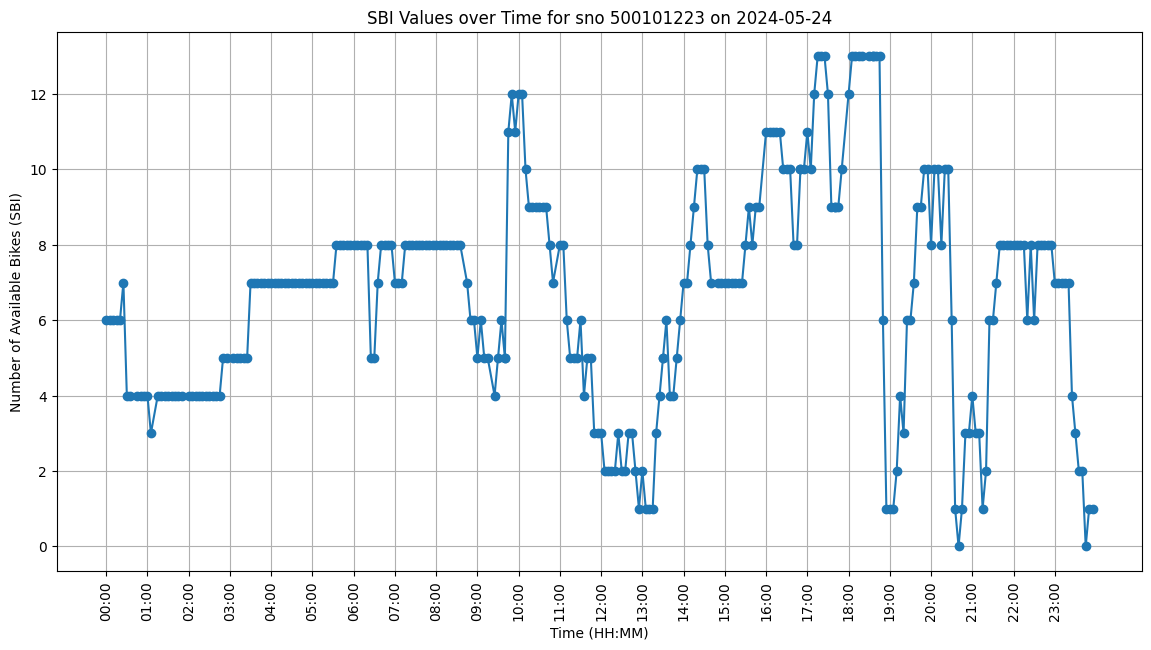

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
file_path = '3weeks.csv'  
df = pd.read_csv(file_path)

# Filter specific sno and a specific date
specific_sno = 500101223 # Modify the value to select sno
specific_date = '2024-05-24'
df_filtered = df[(df['sno'] == specific_sno) & (df['date'] == specific_date)]

# Ensure 'time' column is converted to string type for processing
df_filtered['time'] = df_filtered['time'].astype(str)

# Remove seconds part from the time
df_filtered['time'] = df_filtered['time'].apply(lambda x: x[:5] if len(x) > 5 else x)

# Convert 'time' column to datetime format and change to time series
df_filtered['time'] = pd.to_datetime(df_filtered['time'], format='%H:%M')

# Plot sbi versus time
plt.figure(figsize=(14, 7))
plt.plot(df_filtered['time'], df_filtered['sbi'], marker='o')
plt.title(f'SBI Values over Time for sno {specific_sno} on {specific_date}')
plt.xlabel('Time (HH:MM)')
plt.ylabel('Number of Available Bikes (SBI)')
plt.xticks(rotation=90)
plt.grid(True)

# Set custom x-axis ticks
xticks = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='1H')
plt.gca().set_xticks(xticks)
plt.gca().set_xticklabels([time.strftime('%H:%M') for time in xticks])

plt.show()
